<a href="https://colab.research.google.com/github/NavedAFZ/NLP/blob/master/Bigrans_leminization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
 nltk.download('reuters')

[nltk_data] Downloading package reuters to /root/nltk_data...


True

In [4]:
import nltk

#1. Exploring the reuters corpus

In [ ]:
from nltk.corpus import reuters

reuters.readme().replace('\n', ' ')

In [ ]:
reuters.fileids()

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
reuters.sents('test/14826')

[['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.'], ['They', 'told', 'Reuter', 'correspondents', 'in', 'Asian', 'capitals', 'a', 'U', '.', 'S', '.', 'Move', 'against', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'U', '.', 'S', '.', 'And', 'lead', 'to', 'curbs', 'on', 'American', 'imports', 'of', 'their', 'products', '.'], ...]

#2. Bigrams

In [11]:
trade_words = reuters.words(categories='trade')
len(trade_words)


142723

In [ ]:
trade_words_condensed = trade_words[:100]
trade_words_condensed


In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# Remove stopwords from trade_words_condensed and lower case it
trade_words_condensed = [w.lower() for w in trade_words_condensed if w.lower() not in stopwords.words('english')]
trade_words_condensed[:10]

In [17]:
import string # Contains string constants eg. ascii_lowercase which is 'a...z', string formatting functions, other string functions like .capwords() and .translate().

# Remove punctuation
# trade_words_condensed = [w for w in trade_words_condensed if w not in string.punctuation]
punct_combo = [c + "\"" for c in string.punctuation ] + ["\"" + c for c in string.punctuation] + [".-", ":-", "..", "..."]
#trade_words_condensed = [w for w in trade_words_condensed if w not in string.punctuation and w not in punct_combo]
#trade_words_condensed

In [ ]:
punct_combo

In [ ]:
trade_words_condensed = [w for w in trade_words_condensed if w not in string.punctuation and w not in punct_combo]
trade_words_condensed

In [22]:
from nltk import bigrams

bi_trade_words_condensed = list(bigrams(trade_words_condensed))
bi_trade_words_condensed[:5]


[('asian', 'exporters'),
 ('exporters', 'fear'),
 ('fear', 'damage'),
 ('damage', 'u'),
 ('u', 'japan')]

In [23]:
from nltk import FreqDist

bi_fdist = FreqDist(bi_trade_words_condensed)



In [ ]:
bi_fdist

In [25]:
for word, frequency in bi_fdist.most_common(3):
    print(word, frequency)
#bi_fdist.plot(3, cumulative=False)

('u', 'japan') 2
('asian', 'exporters') 1
('exporters', 'fear') 1


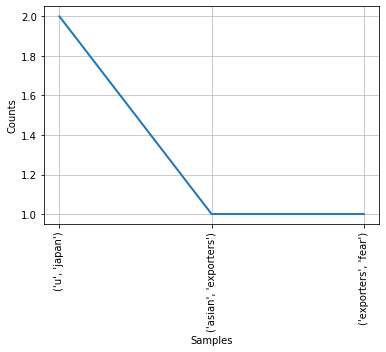

In [26]:
bi_fdist.plot(3, cumulative=False)

#3. Stemming

In [27]:
from nltk.stem import (PorterStemmer, LancasterStemmer)
from nltk.stem.snowball import SnowballStemmer # This is "Porter 2" and is considered the optimal stemmer.

porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("english")

print(porter.stem('Re-testing'), lancaster.stem('Re-testing'), snowball.stem('Re-testing'))


re-test re-testing re-test


In [ ]:
# Fun fact: SnowballStemmer can stem several other languages beside English.
# To make, for instance, a French stemmer, we can do the following: french_stemmer = SnowballStemmer('french')
SnowballStemmer.languages

In [ ]:
from nltk import word_tokenize

sentence = "So, we'll go no more a-roving. So late into the night, Though the heart be still as loving, And the moon be still as bright."

# This uses the 3-argument version of str.maketrans with arguments (x, y, z) where 'x' and 'y' must be equal-length strings and characters in 'x' are replaced by characters in 'y'. 'z' is a string (string.punctuation here) where each character in the string is mapped to None
translator = str.maketrans('', '', string.punctuation)
translator

# This is an alternative that creates a dictionary mapping of every character from string.punctuation to None (this will also work but creates a whole dictionary so is slower)
#translator = str.maketrans(dict.fromkeys(string.punctuation))

In [32]:

tokens = word_tokenize(sentence.translate(translator))
tokens


['So',
 'well',
 'go',
 'no',
 'more',
 'aroving',
 'So',
 'late',
 'into',
 'the',
 'night',
 'Though',
 'the',
 'heart',
 'be',
 'still',
 'as',
 'loving',
 'And',
 'the',
 'moon',
 'be',
 'still',
 'as',
 'bright']

In [33]:
for stemmer in [porter, lancaster, snowball]:
    print([stemmer.stem(t) for t in tokens])

['So', 'well', 'go', 'no', 'more', 'arov', 'So', 'late', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'still', 'as', 'love', 'and', 'the', 'moon', 'be', 'still', 'as', 'bright']
['so', 'wel', 'go', 'no', 'mor', 'arov', 'so', 'lat', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'stil', 'as', 'lov', 'and', 'the', 'moon', 'be', 'stil', 'as', 'bright']
['so', 'well', 'go', 'no', 'more', 'arov', 'so', 'late', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'still', 'as', 'love', 'and', 'the', 'moon', 'be', 'still', 'as', 'bright']



#4. Lemmatizing
Lemmatization aims to achieve a similar base "stem" for a word, but aims to derive the genuine dictionary root word, not just a trunctated version of the word.

In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [36]:

# The default lemmatization method with the Python NLTK is the WordNet lemmatizer.
from nltk import WordNetLemmatizer

wnl = WordNetLemmatizer()

print(wnl.lemmatize('brightening'), wnl.lemmatize('boxes'))


brightening box


In [37]:
# As we saw above, sometimes, if we try to lemmatize a word, it will end up with the same word. This is because the default part of speech is nouns.
wnl.lemmatize('brightening', pos='v')

'brighten'